state and cause
discovery date, day of yr, time

statues code for type of fire

cont_date


[time length, code of fire]


make an analysis
u will get a plots

tran and test and pedict

which state gets the code of fire using the duration and area burnt




In [3]:
import pandas as pd

In [4]:
from sqlite3 import connect

In [5]:
conn = connect(r"C:\Users\DELL\Desktop\UMBC Academic\Cap\Data\archive\FPA_FOD_20170508.sqlite")

In [6]:
conn

In [7]:
data = pd.read_sql(sql = """SELECT name FROM sqlite_master  
  WHERE type='table';""",con = conn )

In [8]:
data

,name
0,spatial_ref_sys
1,spatialite_history
2,sqlite_sequence
3,geometry_columns
4,spatial_ref_sys_aux
5,views_geometry_columns
6,virts_geometry_columns
7,geometry_columns_statistics
8,views_geometry_columns_statistics
9,virts_geometry_columns_statistics


In [9]:
for table in data['name']:
    try:
        in_data = pd.read_sql(sql = 'select * from '+table, con = conn)
        if table != 'SpatialIndex':
            print(table,in_data.shape)
    except:
        pass

spatial_ref_sys (4924, 6)
spatialite_history (16, 7)
sqlite_sequence (3, 2)
geometry_columns (1, 6)
spatial_ref_sys_aux (4873, 12)
views_geometry_columns (0, 6)
virts_geometry_columns (0, 5)
geometry_columns_statistics (1, 8)
views_geometry_columns_statistics (0, 8)
virts_geometry_columns_statistics (0, 8)
geometry_columns_field_infos (0, 14)
views_geometry_columns_field_infos (0, 14)
virts_geometry_columns_field_infos (0, 14)
geometry_columns_time (1, 5)
geometry_columns_auth (1, 4)
views_geometry_columns_auth (0, 3)
virts_geometry_columns_auth (0, 3)
sql_statements_log (0, 7)
Fires (1880465, 39)
idx_Fires_Shape (1880465, 5)
idx_Fires_Shape_node (72263, 2)
idx_Fires_Shape_rowid (1880465, 2)
idx_Fires_Shape_parent (72262, 2)
NWCG_UnitIDActive_20170109 (5867, 13)


In [120]:
fires_data = pd.read_sql(sql = 'select * from Fires', con = conn)

In [121]:
copy_data = fires_data

In [122]:
fires_data.head().T

,0,1,2,3,4
OBJECTID,1,2,3,4,5
FOD_ID,1,2,3,4,5
FPA_ID,FS-1418826,FS-1418827,FS-1418835,FS-1418845,FS-1418847
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
SOURCE_SYSTEM,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT,FS-FIRESTAT
NWCG_REPORTING_AGENCY,FS,FS,FS,FS,FS
NWCG_REPORTING_UNIT_ID,USCAPNF,USCAENF,USCAENF,USCAENF,USCAENF
NWCG_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest
SOURCE_REPORTING_UNIT,0511,0503,0503,0503,0503
SOURCE_REPORTING_UNIT_NAME,Plumas National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest,Eldorado National Forest


In [123]:
null_data = fires_data.isna().sum()

In [124]:
null_data

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

In [ ]:
#change
FIPS_CODE-->COUNTY
corr--> cont_date&small_fire?

In [125]:
#removing null values
columns = []
for i in null_data.index:
    if null_data[i]/fires_data.shape[0]>=0.95:
        columns.append(i)

In [126]:
#columns that has more than 95%null values
columns

['ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME']

Removing columns that are irrelevant for the model prediction and EDA

In [127]:
#removing columns that are IDs and irrelevant to the fire prediction
columns.extend("""FOD_ID, FPA_ID, SOURCE_SYSTEM, NWCG_REPORTING_UNIT_ID, NWCG_REPORTING_UNIT_NAME, SOURCE_REPORTING_UNIT_NAME, LOCAL_FIRE_REPORT_ID, LOCAL_INCIDENT_ID, FIPS_CODE, FIPS_NAME, Shape""".split(', '))

In [128]:
columns

['ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

In [129]:
fires_data.drop(columns = columns,axis=1,inplace=True)

In [130]:
fires_data.drop(['OBJECTID', 'FIRE_CODE'], axis=1, inplace=True)

Converting the DISCOVERY_DATE AND CONT_DATE, which are in julian date to standard date

In [131]:
#conversion of julian date to calender date
from datetime import datetime
def julian_to_standard(julian_date):
    if pd.isna(julian_date):
        return pd.NA
    else:
        return datetime.fromordinal(int(julian_date) - 1721425).date()
fires_data['DISCOVERY_DATE'] = fires_data['DISCOVERY_DATE'].apply(julian_to_standard)
fires_data['CONT_DATE'] = fires_data['CONT_DATE'].apply(julian_to_standard)

In [132]:
fires_data['DURATION_DATE'] = fires_data['CONT_DATE'] - fires_data['DISCOVERY_DATE']

In [133]:
fires_data['DURATION_DATE']  =fires_data['DURATION_DATE'].dt.days

Filling NA values in the computed DURATION_DATE by grouping FIRE_SIZE_CLASS and STATE columns

In [134]:
#filling duration_doy
fires_data['DURATION_DATE'] = fires_data.groupby(['FIRE_SIZE_CLASS', 'STATE'])['DURATION_DATE'].transform(lambda x: x.fillna(x.mean()))
fires_data['DURATION_DATE'].fillna(fires_data['DURATION_DATE'].mean(), inplace=True)

In [135]:
fires_data.isna().sum()

SOURCE_SYSTEM_TYPE            0
NWCG_REPORTING_AGENCY         0
SOURCE_REPORTING_UNIT         0
FIRE_NAME                957189
FIRE_YEAR                     0
DISCOVERY_DATE                0
DISCOVERY_DOY                 0
DISCOVERY_TIME           882638
STAT_CAUSE_CODE               0
STAT_CAUSE_DESCR              0
CONT_DATE                891531
CONT_DOY                 891531
CONT_TIME                972173
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_CODE                    0
OWNER_DESCR                   0
STATE                         0
COUNTY                   678148
DURATION_DATE                 0
dtype: int64

Filling NA values of CONT_DATE

In [136]:
#filling null values of cont_date
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')
fires_data['CONT_DATE'] = fires_data['DISCOVERY_DATE']+fires_data['DURATION_DATE'].transform(lambda x:timedelta(days=x))

In [137]:
fires_data['CONT_DOY'] = fires_data['DISCOVERY_DOY']+fires_data['DURATION_DATE']

Filling the unknown COUNTY names by grouping Fire DISCOVERED_DATE and STATE

In [138]:
import numpy as np
fires_data['COUNTY'] = fires_data.groupby(['DISCOVERY_DATE', 'STATE'])['COUNTY'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [139]:
#filling na values of firename based on the grouping of FIRE_SIZE_CLASS
def get_mode(series):
    if len(series.mode()) > 0:
        return series.mode()[0]
    else:
        return "UNKNOWN"
fires_data['FIRE_NAME'] = fires_data.groupby('FIRE_SIZE_CLASS')['FIRE_NAME'].transform(lambda x: x.fillna(get_mode(x)))

In [140]:
fires_data.isna().sum()

SOURCE_SYSTEM_TYPE            0
NWCG_REPORTING_AGENCY         0
SOURCE_REPORTING_UNIT         0
FIRE_NAME                     0
FIRE_YEAR                     0
DISCOVERY_DATE                0
DISCOVERY_DOY                 0
DISCOVERY_TIME           882638
STAT_CAUSE_CODE               0
STAT_CAUSE_DESCR              0
CONT_DATE                     0
CONT_DOY                      0
CONT_TIME                972173
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_CODE                    0
OWNER_DESCR                   0
STATE                         0
COUNTY                   347658
DURATION_DATE                 0
dtype: int64

In [141]:
fires_data.drop(['DISCOVERY_TIME','CONT_TIME'],axis=1, inplace=True)

In [142]:
fires_data.isna().sum()

SOURCE_SYSTEM_TYPE            0
NWCG_REPORTING_AGENCY         0
SOURCE_REPORTING_UNIT         0
FIRE_NAME                     0
FIRE_YEAR                     0
DISCOVERY_DATE                0
DISCOVERY_DOY                 0
STAT_CAUSE_CODE               0
STAT_CAUSE_DESCR              0
CONT_DATE                     0
CONT_DOY                      0
FIRE_SIZE                     0
FIRE_SIZE_CLASS               0
LATITUDE                      0
LONGITUDE                     0
OWNER_CODE                    0
OWNER_DESCR                   0
STATE                         0
COUNTY                   347658
DURATION_DATE                 0
dtype: int64

In [143]:
fires_data.dropna(subset=['COUNTY'], inplace=True)

Replacing Missing/Undefined attribute in STAT_CAUSE_DESCR to possible cause using grouping.

In [144]:
fires_data.isna().sum()

SOURCE_SYSTEM_TYPE       0
NWCG_REPORTING_AGENCY    0
SOURCE_REPORTING_UNIT    0
FIRE_NAME                0
FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE                0
CONT_DOY                 0
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY                   0
DURATION_DATE            0
dtype: int64

In [145]:
fires_data['STAT_CAUSE_DESCR'] = fires_data['STAT_CAUSE_DESCR'].transform(lambda x: pd.NA if x=='Missing/Undefined' else x)
fires_data['STAT_CAUSE_DESCR'] = fires_data.groupby(['STATE','COUNTY','FIRE_YEAR'])['STAT_CAUSE_DESCR'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

In [146]:
fires_data.isna().sum()

SOURCE_SYSTEM_TYPE           0
NWCG_REPORTING_AGENCY        0
SOURCE_REPORTING_UNIT        0
FIRE_NAME                    0
FIRE_YEAR                    0
DISCOVERY_DATE               0
DISCOVERY_DOY                0
STAT_CAUSE_CODE              0
STAT_CAUSE_DESCR         36200
CONT_DATE                    0
CONT_DOY                     0
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
LATITUDE                     0
LONGITUDE                    0
OWNER_CODE                   0
OWNER_DESCR                  0
STATE                        0
COUNTY                       0
DURATION_DATE                0
dtype: int64

In [147]:
fires_data.dropna(subset=['STAT_CAUSE_DESCR'], inplace=True)

In [148]:
fires_data.isna().sum()

SOURCE_SYSTEM_TYPE       0
NWCG_REPORTING_AGENCY    0
SOURCE_REPORTING_UNIT    0
FIRE_NAME                0
FIRE_YEAR                0
DISCOVERY_DATE           0
DISCOVERY_DOY            0
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
CONT_DATE                0
CONT_DOY                 0
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
LATITUDE                 0
LONGITUDE                0
OWNER_CODE               0
OWNER_DESCR              0
STATE                    0
COUNTY                   0
DURATION_DATE            0
dtype: int64

In [149]:
fires_data.shape

(1496607, 20)

In [150]:
correlation_matrix = fires_data.corr()
top_correlated_values = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(10)
top_correlated_values

FIRE_YEAR        FIRE_YEAR          1.000000
DISCOVERY_DOY    CONT_DOY           0.990523
OWNER_CODE       LONGITUDE          0.407028
                 STAT_CAUSE_CODE    0.311032
DURATION_DATE    CONT_DOY           0.151295
LATITUDE         CONT_DOY           0.150824
STAT_CAUSE_CODE  LONGITUDE          0.146740
DISCOVERY_DOY    LATITUDE           0.144536
DURATION_DATE    FIRE_SIZE          0.074788
LATITUDE         DURATION_DATE      0.057786
dtype: float64

In [151]:
top_states = fires_data['STATE'].value_counts().head(5).index
top_states_data = fires_data[fires_data['STATE'].isin(top_states)] #STAT_CAUSE_DESCR,FIRE_SIZE_CLASS, OWNER_DESCR
top_states_data

,SOURCE_SYSTEM_TYPE,NWCG_REPORTING_AGENCY,SOURCE_REPORTING_UNIT,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,DURATION_DATE
0,FED,FS,0511,FOUNTAIN,2005,2005-02-01,33,9.0,Miscellaneous,2005-02-01,33.000000,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,0.000000
1,FED,FS,0503,PIGEON,2004,2004-05-11,133,1.0,Lightning,2004-05-11,133.000000,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,0.000000
2,FED,FS,0503,SLACK,2004,2004-05-30,152,5.0,Debris Burning,2004-05-30,152.000000,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,0.000000
3,FED,FS,0503,DEER,2004,2004-06-27,180,1.0,Lightning,2004-07-02,185.000000,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,5.000000
4,FED,FS,0503,STEVENOT,2004,2004-06-27,180,1.0,Lightning,2004-07-02,185.000000,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,NONFED,ST/C&L,CASHU,ODESSA 2,2015,2015-09-25,269,13.0,Miscellaneous,2015-09-25,269.000000,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,RIVERSIDE,0.000000
1880461,NONFED,ST/C&L,CATCU,UNKNOWN,2015,2015-10-04,278,9.0,Miscellaneous,2015-10-04,278.550568,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,057,0.550568
1880462,NONFED,ST/C&L,CATCU,UNKNOWN,2015,2015-05-01,122,13.0,Miscellaneous,2015-05-01,122.550568,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,FRESNO,0.550568
1880463,NONFED,ST/C&L,CATCU,GRASS FIRE,2015,2015-10-13,287,13.0,Miscellaneous,2015-10-14,288.055029,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,083,1.055029


# EDA

In [152]:
copy_processed_fires_data = fires_data

In [153]:
fires_data.columns

Index(['SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT',
       'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE',
       'OWNER_DESCR', 'STATE', 'COUNTY', 'DURATION_DATE'],
      dtype='object')

In [154]:
fires_data.dtypes

SOURCE_SYSTEM_TYPE        object
NWCG_REPORTING_AGENCY     object
SOURCE_REPORTING_UNIT     object
FIRE_NAME                 object
FIRE_YEAR                  int64
DISCOVERY_DATE            object
DISCOVERY_DOY              int64
STAT_CAUSE_CODE          float64
STAT_CAUSE_DESCR          object
CONT_DATE                 object
CONT_DOY                 float64
FIRE_SIZE                float64
FIRE_SIZE_CLASS           object
LATITUDE                 float64
LONGITUDE                float64
OWNER_CODE               float64
OWNER_DESCR               object
STATE                     object
COUNTY                    object
DURATION_DATE            float64
dtype: object

In [155]:
#scaling the data for better visualization, excluding the nummerical columns: Latitude, Longitude, DURATION_DATE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = fires_data.select_dtypes(include=['float64', 'int64']).columns.drop(['LATITUDE', 'LONGITUDE', 'DURATION_DATE','FIRE_YEAR', 'STAT_CAUSE_CODE', 'OWNER_CODE'])
fires_data[numerical_columns] = scaler.fit_transform(fires_data[numerical_columns])


In [156]:
fires_data.head().T

,0,1,2,3,4
SOURCE_SYSTEM_TYPE,FED,FED,FED,FED,FED
NWCG_REPORTING_AGENCY,FS,FS,FS,FS,FS
SOURCE_REPORTING_UNIT,0511,0503,0503,0503,0503
FIRE_NAME,FOUNTAIN,PIGEON,SLACK,DEER,STEVENOT
FIRE_YEAR,2005,2004,2004,2004,2004
DISCOVERY_DATE,2005-02-01,2004-05-11,2004-05-30,2004-06-27,2004-06-27
DISCOVERY_DOY,-1.481119,-0.358425,-0.145113,0.169242,0.169242
STAT_CAUSE_CODE,9.0,1.0,5.0,1.0,1.0
STAT_CAUSE_DESCR,Miscellaneous,Lightning,Debris Burning,Lightning,Lightning
CONT_DATE,2005-02-01,2004-05-11,2004-05-30,2004-07-02,2004-07-02


In [157]:
fires_data['STAT_CAUSE_DESCR'] = fires_data['STAT_CAUSE_DESCR'].transform(lambda x: pd.NA if x=='Missing/Undefined' else x)

In [158]:
fires_data.groupby(['STATE', 'COUNTY'])['STAT_CAUSE_DESCR'].transform(lambda x:x.fillna(x.mode()[0]))

0           Miscellaneous
1               Lightning
2          Debris Burning
3               Lightning
4               Lightning
                ...      
1880460     Miscellaneous
1880461     Miscellaneous
1880462     Miscellaneous
1880463     Miscellaneous
1880464     Miscellaneous
Name: STAT_CAUSE_DESCR, Length: 1496607, dtype: object

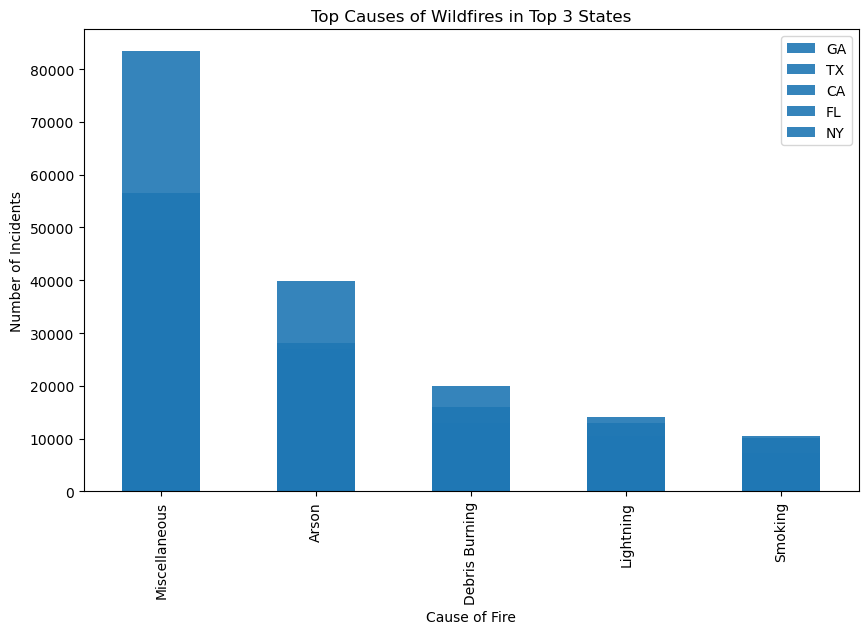

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for state in top_states:
    state_data = top_states_data[top_states_data['STATE'] == state]
    incidents_by_cause = state_data['STAT_CAUSE_DESCR'].value_counts().head(5)
    incidents_by_cause.plot(kind='bar', alpha=0.9,label=state)

plt.title('Top Causes of Wildfires in Top 3 States')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.legend()
plt.show()

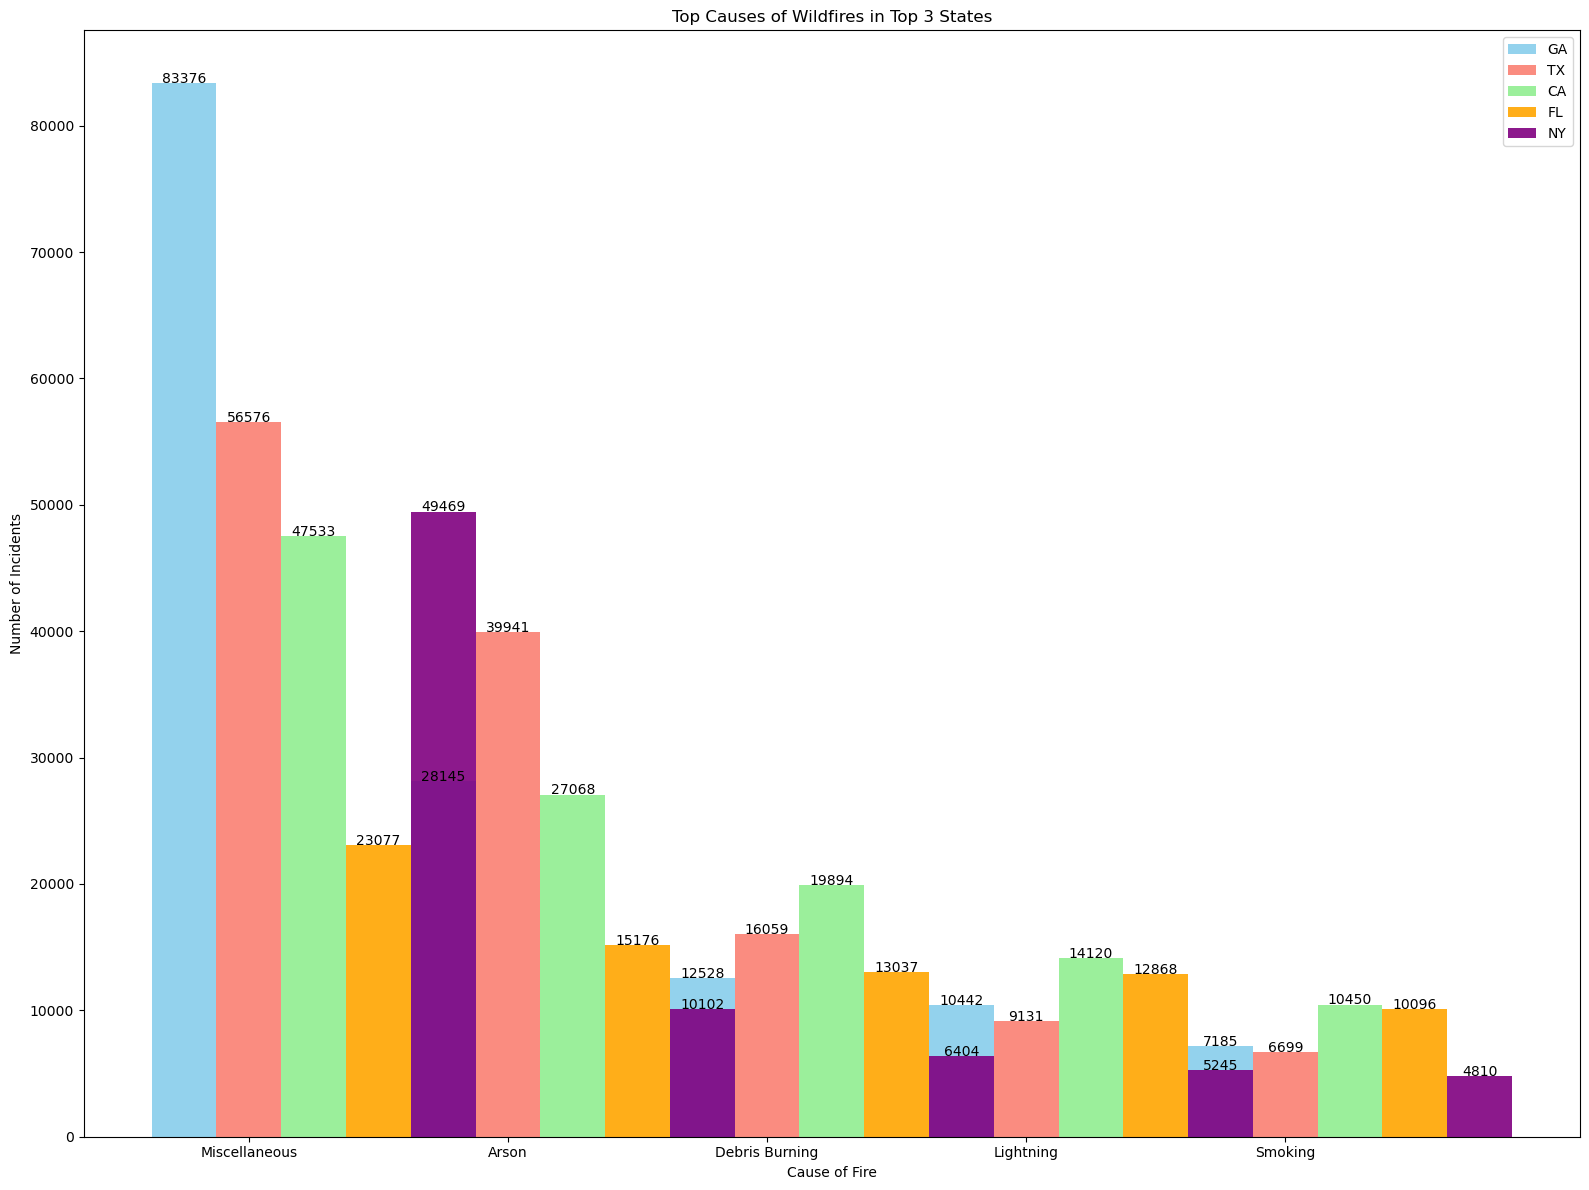

In [162]:
import numpy as np

# Set up the figure and axis
plt.figure(figsize=(16, 12))
ax = plt.gca()

# Define colors for each state
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'purple']

# Iterate over each state and plot side by side bars
for i, state in enumerate(top_states):
    state_data = top_states_data[top_states_data['STATE'] == state]
    incidents_by_cause = state_data['STAT_CAUSE_DESCR'].value_counts().head(5)
    x_offset = i * 0.25  # Offset to place bars side by side
    ax.bar(np.arange(len(incidents_by_cause)) + x_offset, incidents_by_cause.values, width=0.25, color=colors[i], alpha=0.9, label=state)
    
    # Display count on top of each bar
    for j, count in enumerate(incidents_by_cause.values):
        ax.text(j + x_offset, count + 15, str(count), ha='center', color='black')

# Set labels and title
plt.title('Top Causes of Wildfires in Top 3 States')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.xticks(np.arange(len(incidents_by_cause)) + 0.25, incidents_by_cause.index)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()


In [163]:
unique_values_per_column = {}
for column in fires_data.columns:
    unique_values_per_column[column] = fires_data[column].unique()

# Print unique values for each column
for column, values in unique_values_per_column.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()


Unique values for column 'SOURCE_SYSTEM_TYPE':
['FED' 'NONFED' 'INTERAGCY']

Unique values for column 'NWCG_REPORTING_AGENCY':
['FS' 'BIA' 'TRIBE' 'BLM' 'NPS' 'BOR' 'FWS' 'ST/C&L' 'DOD' 'IA' 'DOE']

Unique values for column 'SOURCE_REPORTING_UNIT':
['0511' '0503' '0514' ... 'HICNTY' 'COH-HFD' 'HINPS']

Unique values for column 'FIRE_NAME':
['FOUNTAIN' 'PIGEON' 'SLACK' ... '1-64' 'ODESSA 2'
 'BARKER BL  BIG_BEAR_LAKE_']

Unique values for column 'FIRE_YEAR':
[2005 2004 2006 2008 2002 2007 2009 2001 2003 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2010 2011 2012 2013 2014 2015]

Unique values for column 'DISCOVERY_DATE':
[datetime.date(2005, 2, 1) datetime.date(2004, 5, 11)
 datetime.date(2004, 5, 30) ... datetime.date(2015, 2, 25)
 datetime.date(2015, 12, 28) datetime.date(2015, 12, 29)]

Unique values for column 'DISCOVERY_DOY':
[-1.48111945e+00 -3.58424750e-01 -1.45112757e-01  1.69241759e-01
  1.91695653e-01  2.02922600e-01 -1.02081462e+00  2.14149547e-01
  9.21447208e-01  1.2021208

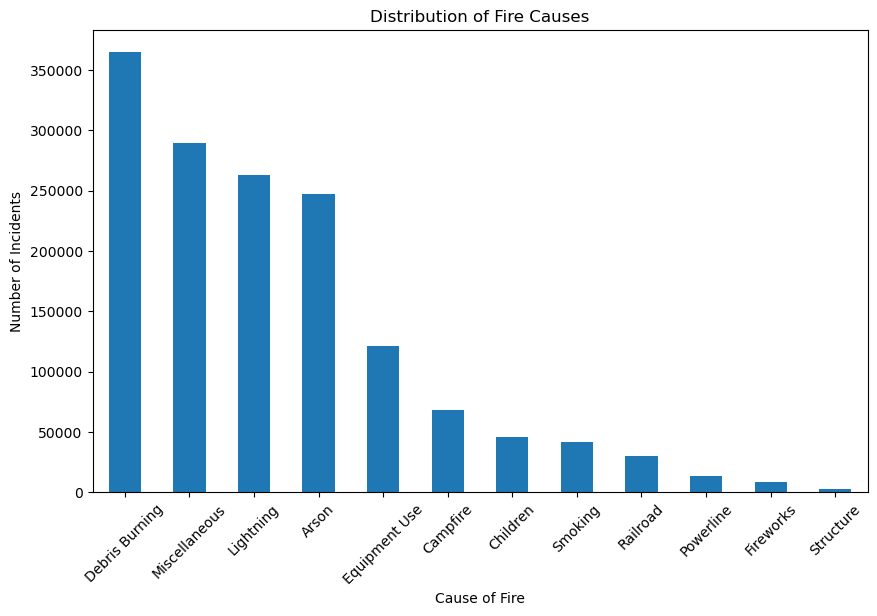

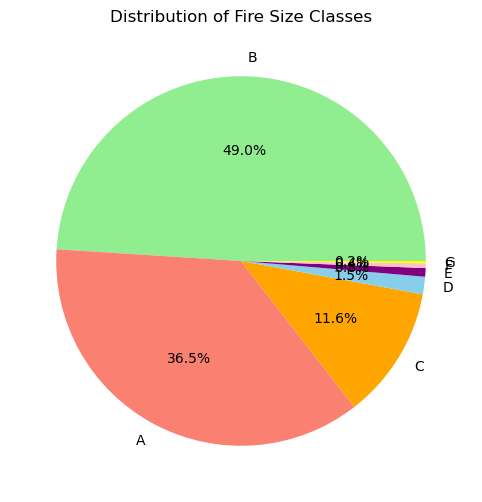

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# fires_data = pd.read_csv("path/to/dataset.csv")

# Basic EDA
# Plotting the distribution of fire causes
plt.figure(figsize=(10, 6))
fires_data['STAT_CAUSE_DESCR'].value_counts().plot(kind='bar')
plt.title('Distribution of Fire Causes')
plt.xlabel('Cause of Fire')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of fire size classes
plt.figure(figsize=(8, 6))
fires_data['FIRE_SIZE_CLASS'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon', 'orange', 'skyblue', 'purple', 'pink', 'yellow'])
plt.title('Distribution of Fire Size Classes')
plt.ylabel('')
plt.show()


In [165]:
fires_data.describe()

,FIRE_YEAR,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE,DURATION_DATE
count,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06,1.496607e+06
mean,2.004709e+03,-1.543569e-16,5.762252e+00,-1.710688e-16,-4.026042e-18,3.686130e+01,-9.559070e+01,1.048343e+01,1.079072e+00
std,6.551787e+00,1.000000e+00,3.366217e+00,1.000000e+00,1.000000e+00,5.625721e+00,1.605847e+01,4.324340e+00,1.237612e+01
min,1.992000e+03,-1.840382e+00,1.000000e+00,-1.831354e+00,-3.128525e-02,1.794492e+01,-1.661500e+02,0.000000e+00,0.000000e+00
25%,2.000000e+03,-8.299565e-01,3.000000e+00,-8.295433e-01,-3.124018e-02,3.269240e+01,-1.105187e+02,8.000000e+00,0.000000e+00
50%,2.006000e+03,8.375536e-04,5.000000e+00,-4.961505e-05,-3.083448e-02,3.544778e+01,-9.196917e+01,1.400000e+01,3.319502e-02
75%,2.010000e+03,7.193622e-01,9.000000e+00,7.213732e-01,-2.993294e-02,4.103850e+01,-8.242642e+01,1.400000e+01,5.330372e-01
max,2.015000e+03,2.257454e+00,1.300000e+01,4.558277e+01,2.515889e+02,6.923220e+01,-6.528807e+01,1.500000e+01,4.018000e+03


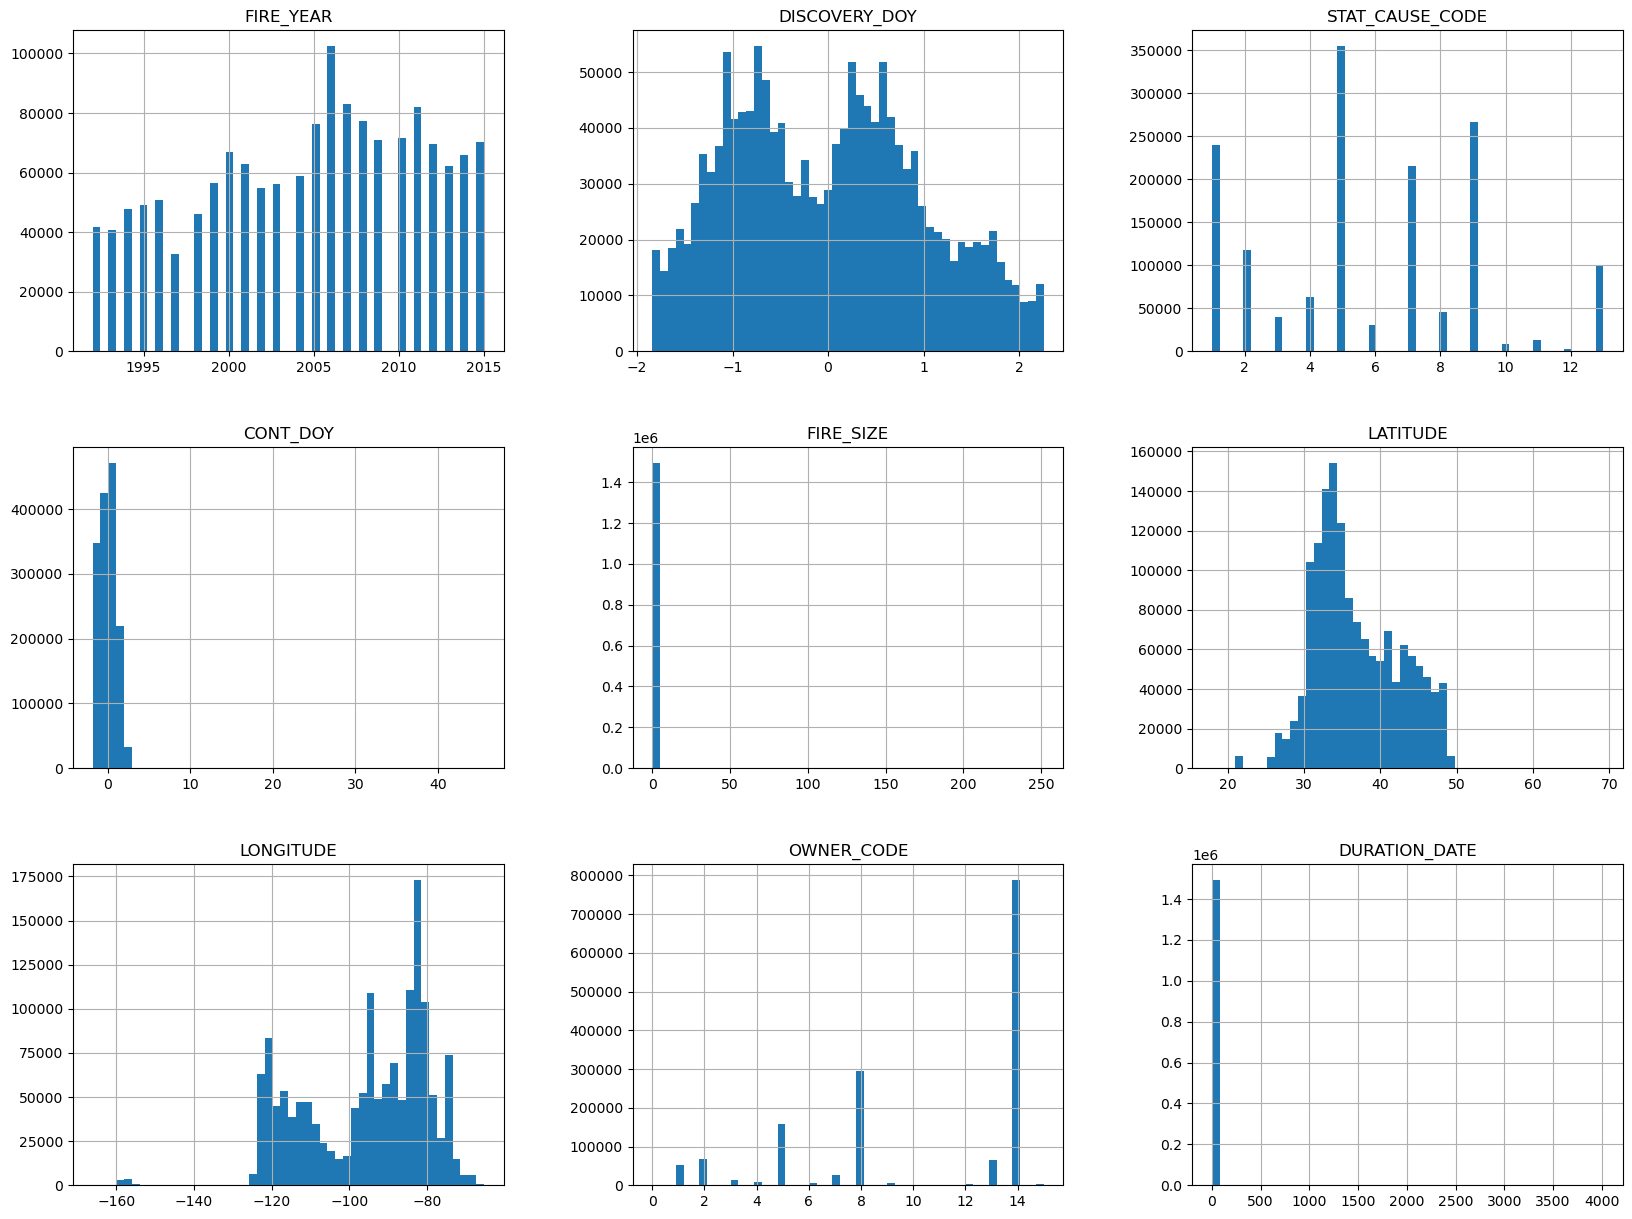

In [166]:
fires_data.hist(bins=50, figsize=(20,15))
plt.show()

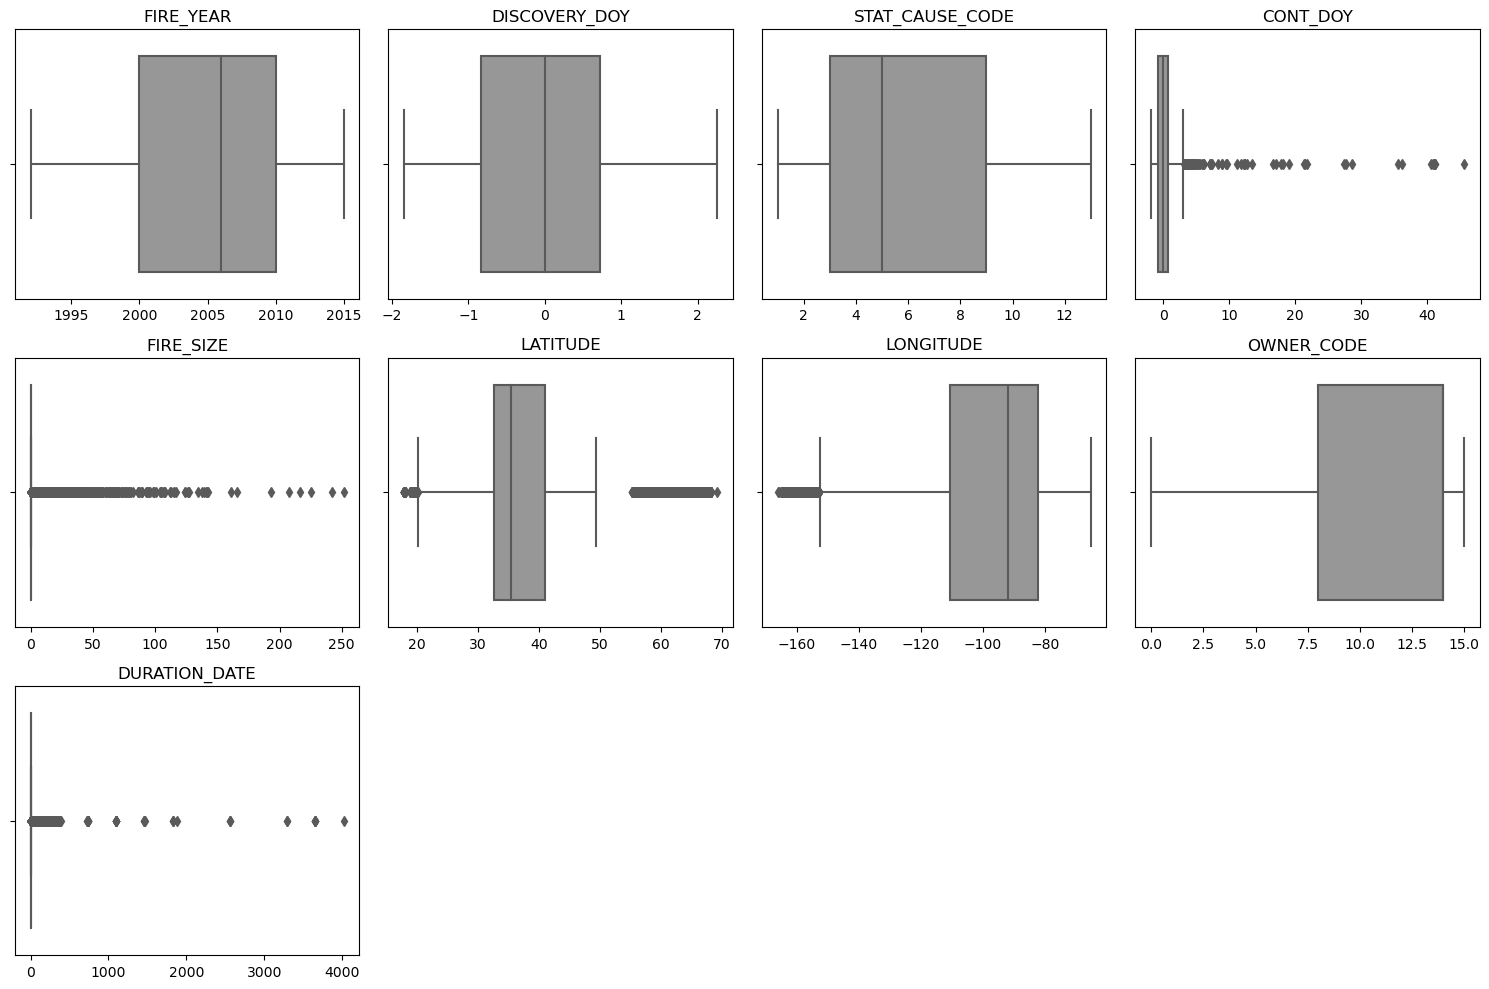

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
numerical_cols = fires_data.select_dtypes(include=np.number).columns

num_rows = 3
num_cols = 4

total_subplots = num_rows * num_cols

blank_plots = total_subplots - len(numerical_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=fires_data[col], ax=axes[i], palette='Greys_r')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(len(numerical_cols), total_subplots):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


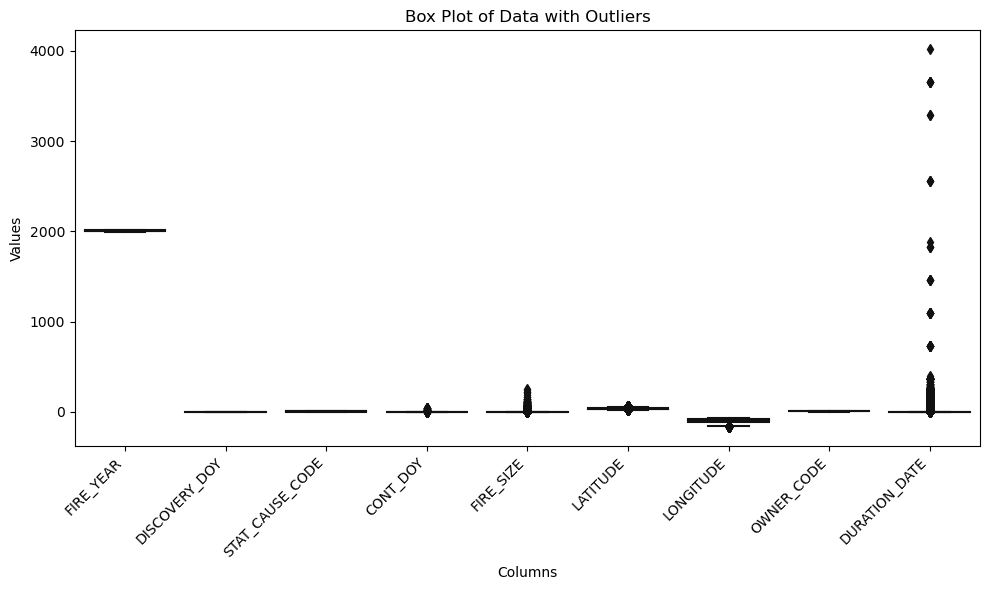

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fires_data, palette='Greys_r')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of Data with Outliers')

plt.tight_layout()
plt.show()


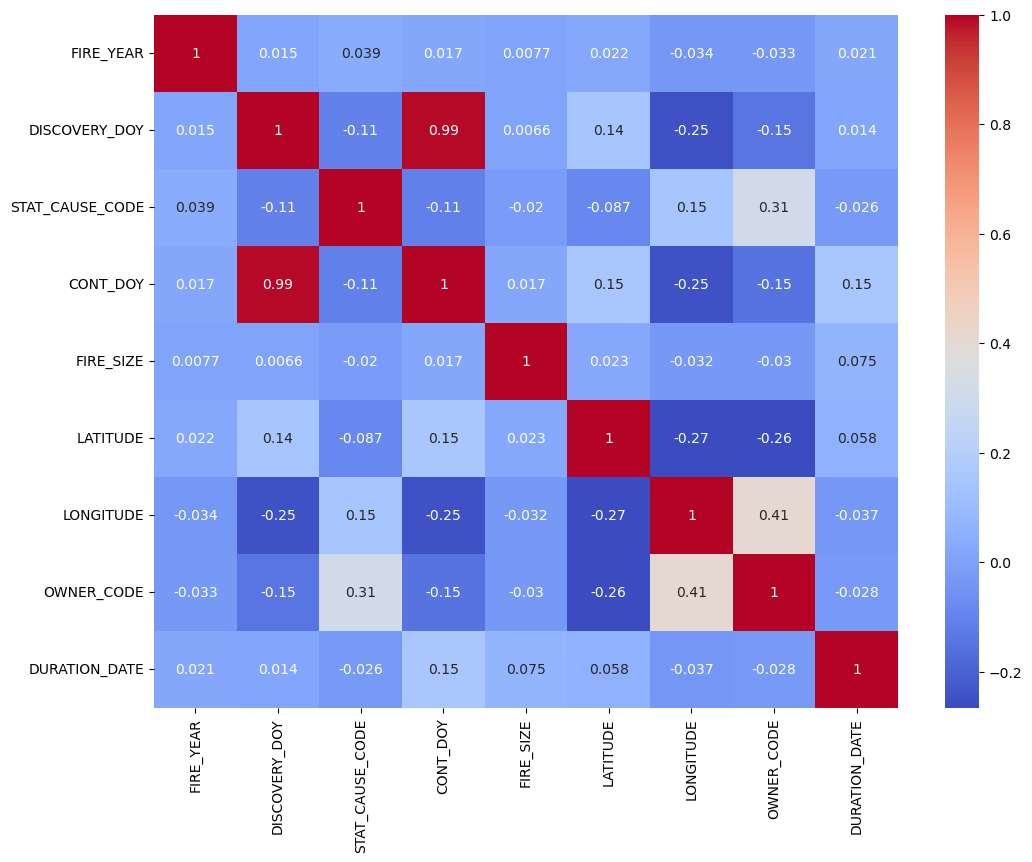

In [169]:

correlation_matrix = fires_data.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


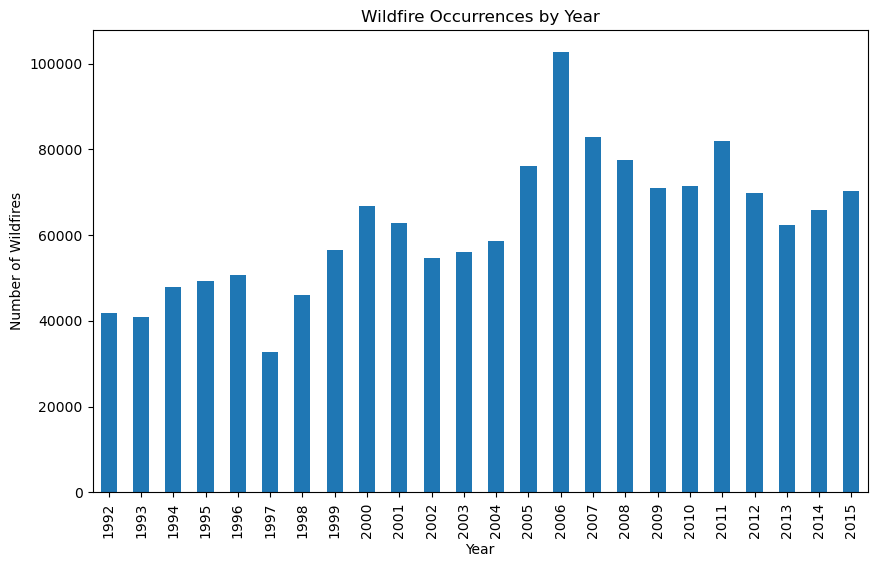

In [170]:
import pandas as pd
import matplotlib.pyplot as plt

yearly_counts = fires_data.groupby(fires_data['FIRE_YEAR']).size()

# Plotting
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar')
plt.title('Wildfire Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Number of Wildfires')
plt.show()

In [171]:
!pip install geopandas

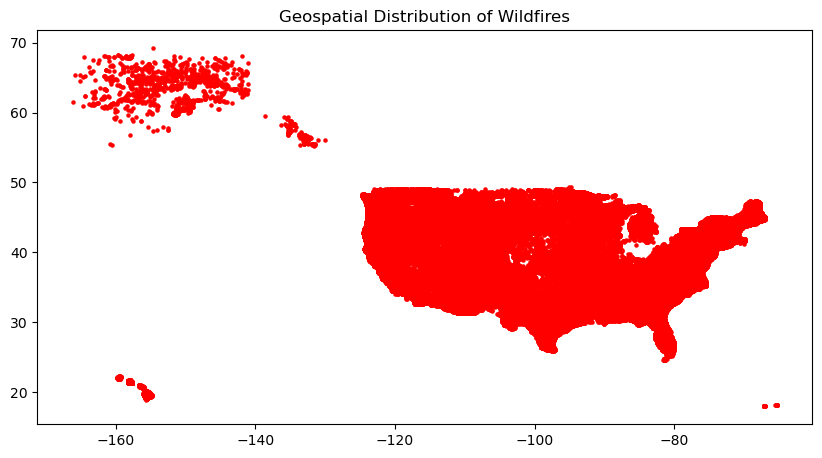

In [172]:
import geopandas as gpd
from shapely.geometry import Point

gdf = gpd.GeoDataFrame(fires_data, geometry=gpd.points_from_xy(fires_data.LONGITUDE, fires_data.LATITUDE))

gdf.plot(marker='o', color='red', markersize=5, figsize=(10, 6))
plt.title('Geospatial Distribution of Wildfires')
plt.show()

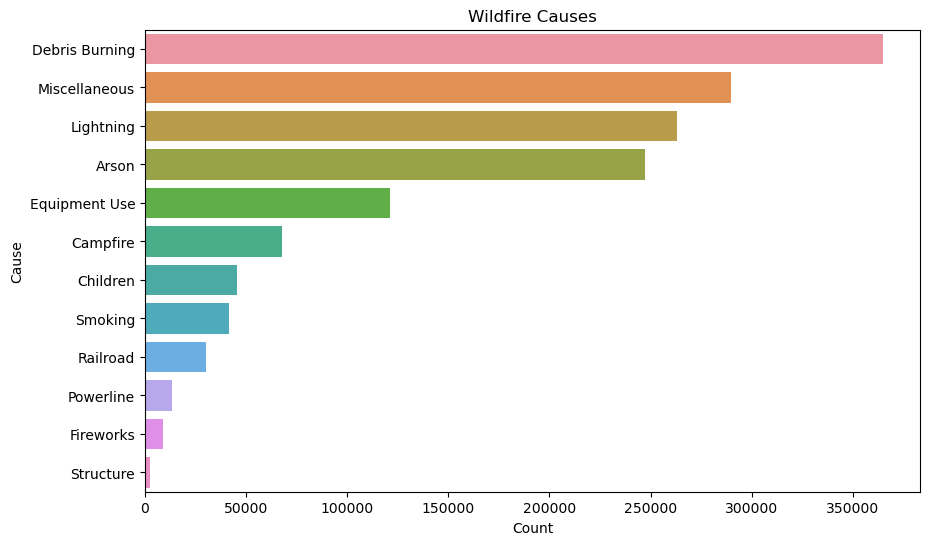

In [173]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='STAT_CAUSE_DESCR', data=fires_data, order = fires_data['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes')
plt.xlabel('Count')
plt.ylabel('Cause')
plt.show()

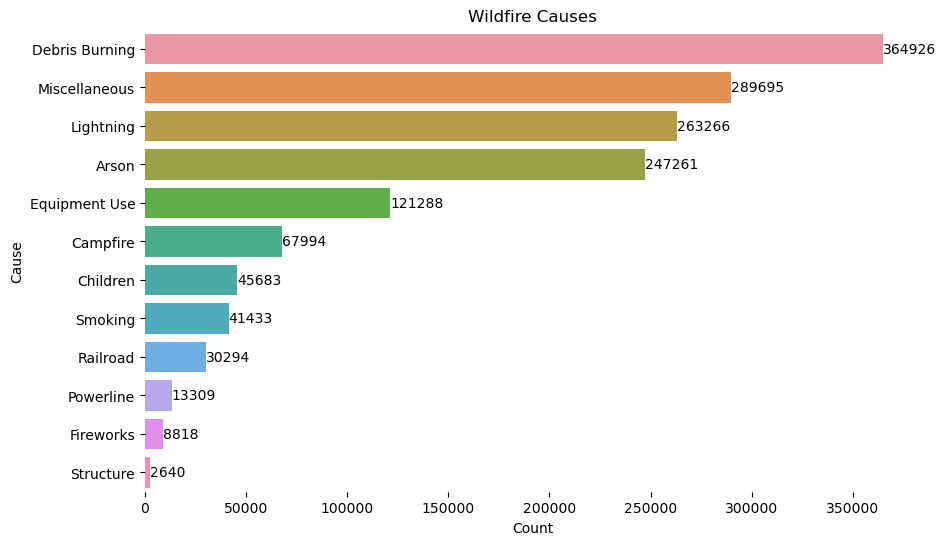

In [174]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='STAT_CAUSE_DESCR', data=fires_data, order=fires_data['STAT_CAUSE_DESCR'].value_counts().index)
plt.title('Wildfire Causes')
plt.xlabel('Count')
plt.ylabel('Cause')

sns.despine(left=True, bottom=True, right=True, top=True)

for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}', (p.get_width() + 10, p.get_y() + p.get_height() / 2), ha='left', va='center')

ax.tick_params(axis='x', labelleft=False)

plt.show()

In [175]:
'''
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['STATE', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'CONT_DATE']

# Set up the grid layout
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each pair of columns for bivariate analysis
for i, col in enumerate(columns):
    if i == 5:
        break  # Stop if we reach the last column
    
    # Plot bivariate analysis
    if col == 'DISCOVERY_DATE':
        sns.histplot(x=col, hue='STATE', data=df, bins=50, kde=True, ax=axes[i])
        axes[i].set_title(f'Frequency of Wildfires Discovered Over Time by State')
    elif col == 'DISCOVERY_DOY':
        sns.boxplot(x='STATE', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Seasonal Patterns in Wildfire Discovery by State')
    elif col == 'CONT_DATE':
        sns.boxplot(x='STATE', y=col, data=df, ax=axes[i])
        axes[i].set_title(f'Duration of Wildfires (from Discovery to Containment) by State')
    else:
        sns.countplot(x=col, hue='STATE', data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of Wildfire Causes Across States' if col == 'STAT_CAUSE_DESCR' else 
                          f'Distribution of Wildfire Causes (Code) Across States' if col == 'STAT_CAUSE_CODE' else 
                          f'Wildfires by {col}')
    
    # Set axis labels
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add legend if applicable
    if col in ['STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE', 'DISCOVERY_DATE']:
        axes[i].legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove the last subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\ncolumns = ['STATE', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE', 'DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'CONT_DATE']\n\n# Set up the grid layout\nfig, axes = plt.subplots(3, 2, figsize=(18, 18))\n\n# Flatten the axes array for easier iteration\naxes = axes.flatten()\n\n# Loop through each pair of columns for bivariate analysis\nfor i, col in enumerate(columns):\n    if i == 5:\n        break  # Stop if we reach the last column\n    \n    # Plot bivariate analysis\n    if col == 'DISCOVERY_DATE':\n        sns.histplot(x=col, hue='STATE', data=df, bins=50, kde=True, ax=axes[i])\n        axes[i].set_title(f'Frequency of Wildfires Discovered Over Time by State')\n    elif col == 'DISCOVERY_DOY':\n        sns.boxplot(x='STATE', y=col, data=df, ax=axes[i])\n        axes[i].set_title(f'Seasonal Patterns in Wildfire Discovery by State')\n    elif col == 'CONT_DATE':\n        sns.boxplot(x='STATE', y=col, data=df, ax=axes[i])\n        axes[i].s

In [176]:
fires_data['STATE'].value_counts()[:10].index.to_list()

['GA', 'TX', 'CA', 'FL', 'NY', 'AZ', 'MS', 'OR', 'NC', 'SC']

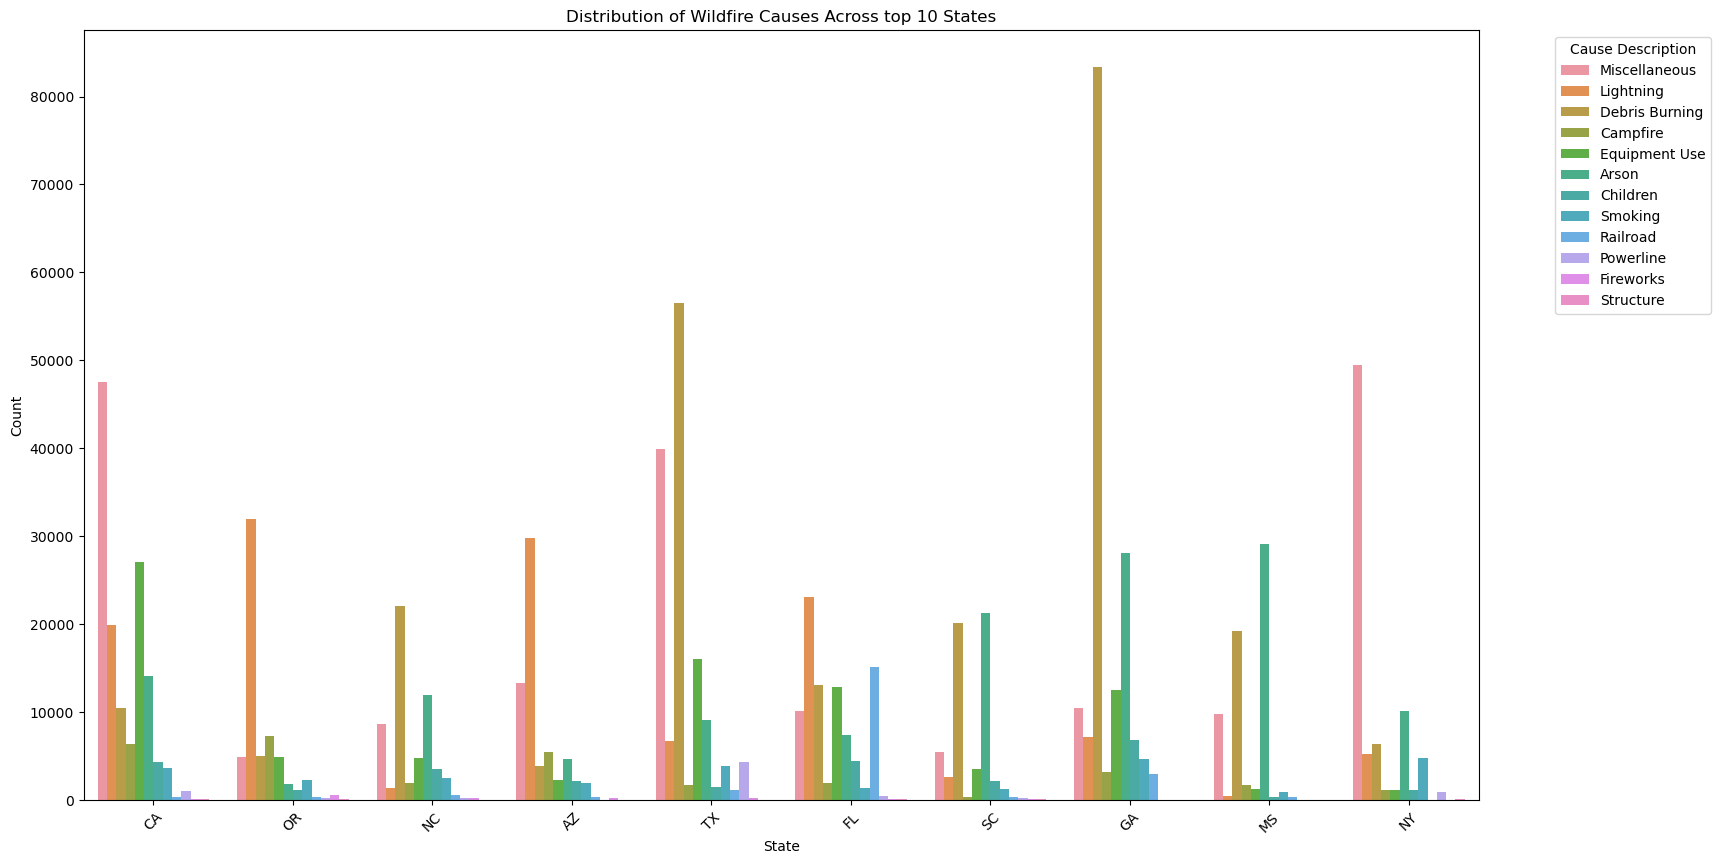

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))
sns.countplot(x='STATE', hue='STAT_CAUSE_DESCR', data=fires_data[fires_data['STATE'].isin(fires_data['STATE'].value_counts()[:10].index.to_list())])
plt.title('Distribution of Wildfire Causes Across top 10 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cause Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
'''
plt.figure(figsize=(12, 6))
sns.histplot(x='DISCOVERY_DATE', hue='STATE', data=fires_data, bins=50, kde=True)
plt.title('Frequency of Wildfires Discovered Over Time by State')
plt.xlabel('Discovery Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
'''

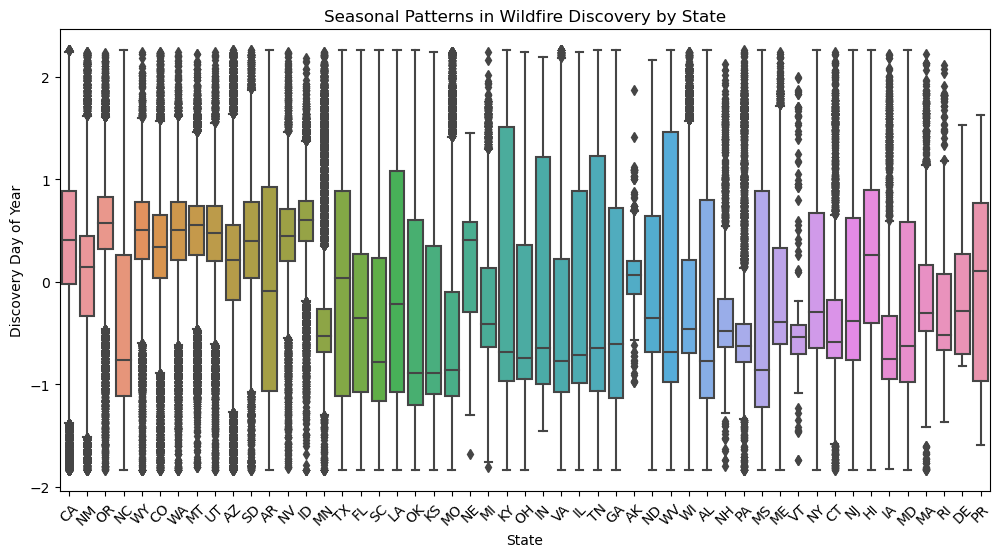

In [179]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='DISCOVERY_DOY', data=fires_data)
plt.title('Seasonal Patterns in Wildfire Discovery by State')
plt.xlabel('State')
plt.ylabel('Discovery Day of Year')
plt.xticks(rotation=45)
plt.show()

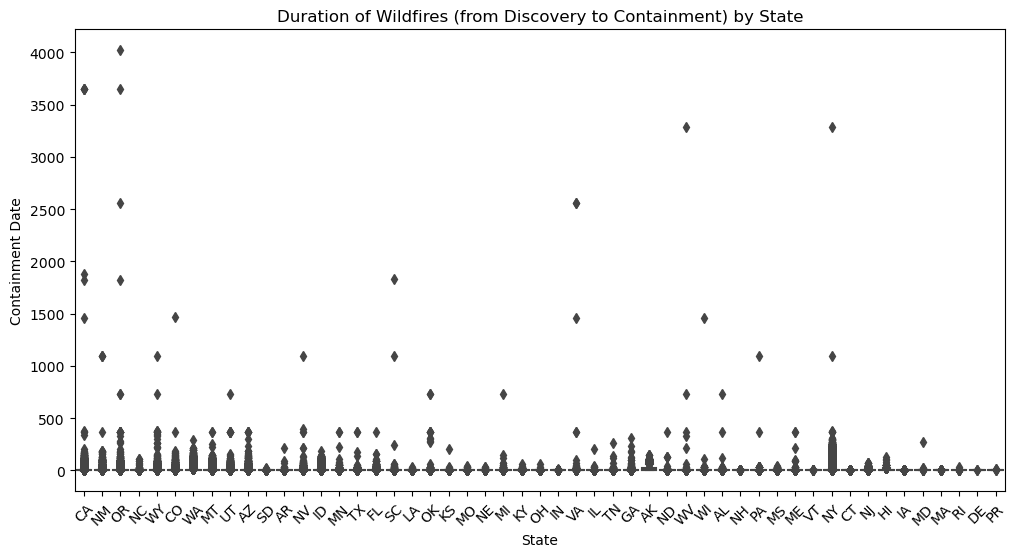

In [180]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='STATE', y='DURATION_DATE', data=fires_data)
plt.title('Duration of Wildfires (from Discovery to Containment) by State')
plt.xlabel('State')
plt.ylabel('Containment Date')
plt.xticks(rotation=45)
plt.show()


In [181]:
top_causes = fires_data[fires_data['STATE'].isin(top_states)]['STAT_CAUSE_DESCR'].value_counts().nlargest(3).index.tolist()
print(top_causes)
top_states_df = fires_data[fires_data['STATE'].isin(top_states)]
top_causes_df = top_states_df[top_states_df['STAT_CAUSE_DESCR'].isin(top_causes)]
top_causes_df['STATE'].head()

['Debris Burning', 'Miscellaneous', 'Equipment Use']


0     CA
2     CA
8     CA
12    CA
16    CA
Name: STATE, dtype: object

In [182]:
import pandas as pd

cause_state_counts = fires_data.groupby(['STAT_CAUSE_DESCR', 'STATE']).size().reset_index(name='count')

cause_state_counts['rank'] = cause_state_counts.groupby('STAT_CAUSE_DESCR')['count'].rank(method='first', ascending=False)

top_causes_df = cause_state_counts[cause_state_counts['rank'] <= 3]

top_causes_df = top_causes_df.drop(columns='rank')

print(top_causes_df)

    STAT_CAUSE_DESCR STATE  count
9              Arson    GA  28145
24             Arson    MS  29132
35             Arson    OK  23206
54          Campfire    AZ   5461
55          Campfire    CA   6352
87          Campfire    OR   7311
105         Children    CA   4352
109         Children    FL   4429
110         Children    GA   6848
159   Debris Burning    GA  83376
176   Debris Burning    NC  22110
192   Debris Burning    TX  56576
204    Equipment Use    CA  27068
208    Equipment Use    FL  12868
242    Equipment Use    TX  16059
271        Fireworks    MT   1387
285        Fireworks    SD   1059
291        Fireworks    WA    959
298        Lightning    AZ  29856
307        Lightning    ID  24758
331        Lightning    OR  31940
348    Miscellaneous    CA  47533
377    Miscellaneous    NY  49469
387    Miscellaneous    TX  39941
399        Powerline    CA   1033
435        Powerline    TX   4345
440        Powerline    WI    974
451         Railroad    FL  15176
452         Ra

In [183]:
cause_state_counts = fires_data.groupby(['STAT_CAUSE_DESCR', 'STATE']).size().reset_index(name='count')

max_indices = cause_state_counts.groupby('STAT_CAUSE_DESCR')['count'].idxmax()

top_causes_df = cause_state_counts.loc[max_indices]

print(top_causes_df)


    STAT_CAUSE_DESCR STATE  count
24             Arson    MS  29132
87          Campfire    OR   7311
110         Children    GA   6848
159   Debris Burning    GA  83376
204    Equipment Use    CA  27068
271        Fireworks    MT   1387
331        Lightning    OR  31940
377    Miscellaneous    NY  49469
435        Powerline    TX   4345
451         Railroad    FL  15176
525          Smoking    NY   4810
584        Structure    WV    342


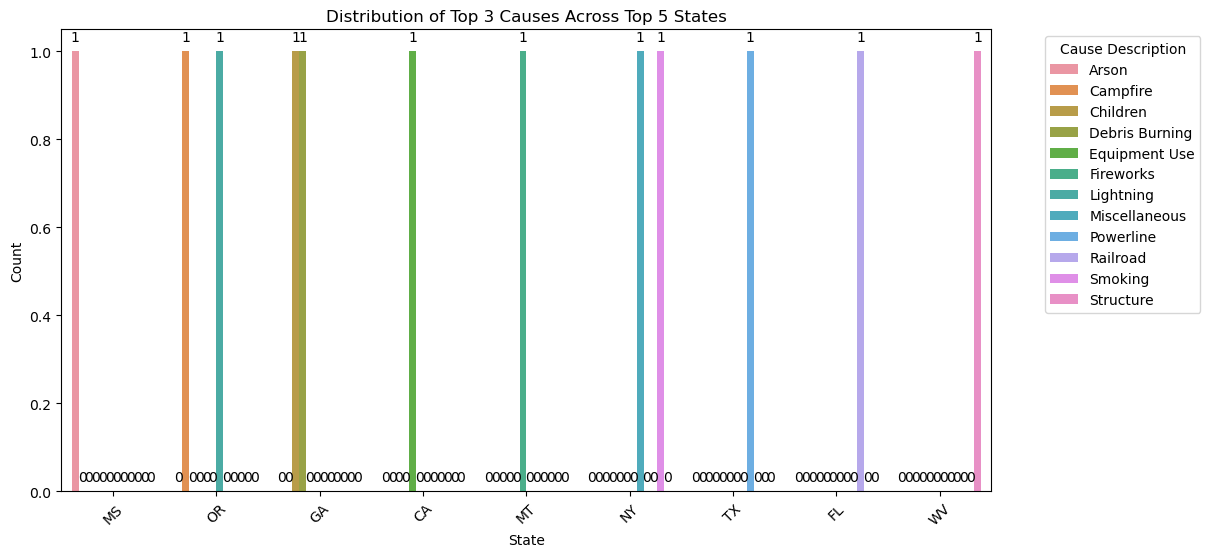

In [184]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='STATE', hue='STAT_CAUSE_DESCR', data=top_causes_df)
plt.title('Distribution of Top 3 Causes Across Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cause Description', bbox_to_anchor=(1.05, 1), loc='upper left')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [185]:
fires_data['DISCOVERY_MONTH'] = fires_data['DISCOVERY_DATE'].transform(lambda x:x.month)

In [186]:
fires_data['DISCOVERY_DOM'] = fires_data['DISCOVERY_DATE'].transform(lambda x:x.day)

In [187]:
fires_data['DISCOVERY_WEEKEND'] = fires_data['DISCOVERY_DATE'].transform(lambda x:x.weekday())

In [188]:
fires_data['CONT_MONTH'] = fires_data['CONT_DATE'].transform(lambda x:x.month)

fires_data['CONT_DOM'] = fires_data['CONT_DATE'].transform(lambda x:x.day)

fires_data['CONT_WEEKEND'] = fires_data['CONT_DATE'].transform(lambda x:x.weekday())

In [189]:
fires_data.columns

Index(['SOURCE_SYSTEM_TYPE', 'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT',
       'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE',
       'OWNER_DESCR', 'STATE', 'COUNTY', 'DURATION_DATE', 'DISCOVERY_MONTH',
       'DISCOVERY_DOM', 'DISCOVERY_WEEKEND', 'CONT_MONTH', 'CONT_DOM',
       'CONT_WEEKEND'],
      dtype='object')

In [190]:
fires_data.drop(['OWNER_DESCR','DISCOVERY_DATE', 'CONT_DATE'],axis=1, inplace=True)

In [191]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
categorical_columns = fires_data.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for column in categorical_columns:
    fires_data[column] = fires_data[column].fillna('Missing')
    fires_data[column] = label_encoder.fit_transform(fires_data[column])

In [192]:
fires_data.head().T

,0,1,2,3,4
SOURCE_SYSTEM_TYPE,0.000000,0.000000,0.000000,0.000000,0.000000
NWCG_REPORTING_AGENCY,5.000000,5.000000,5.000000,5.000000,5.000000
SOURCE_REPORTING_UNIT,193.000000,185.000000,185.000000,185.000000,185.000000
FIRE_NAME,143005.000000,319115.000000,361420.000000,114596.000000,372466.000000
FIRE_YEAR,2005.000000,2004.000000,2004.000000,2004.000000,2004.000000
DISCOVERY_DOY,-1.481119,-0.358425,-0.145113,0.169242,0.169242
STAT_CAUSE_CODE,9.000000,1.000000,5.000000,1.000000,1.000000
STAT_CAUSE_DESCR,7.000000,6.000000,3.000000,6.000000,6.000000
CONT_DOY,-1.476192,-0.366310,-0.155433,0.210828,0.210828
FIRE_SIZE,-0.031240,-0.031173,-0.031240,-0.031240,-0.031240


# MODEL

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [194]:
X = fires_data.drop('DURATION_DATE', axis=1)
y = fires_data['DURATION_DATE']


In [195]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=79, stratify=fires_data['STATE'])

In [196]:
X_remaining.shape, y_remaining.shape

((374152, 22), (374152,))

In [197]:
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.4, shuffle=True, random_state=79, stratify = X_remaining['STATE'])

In [198]:
# Training a linear regression model with default hyperparameters (which are usually considered as optimized for this model)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [199]:
# Predicting the target for the testing set
y_val_pred = model.predict(X_val)

In [200]:
y_val_pred_ceil = np.ceil(y_val_pred)

In [201]:
# Calculating the RMSE (Root Mean Squared Error) for the model's performance
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_ceil))
print(f"The RMSE of the linear regression model is: {rmse}")

The RMSE of the linear regression model is: 0.7153948043596815


In [202]:
# Predicting the target for the testing set
y_test_pred = model.predict(X_test)

y_test_pred_ceil = np.ceil(y_test_pred)

# Calculating the RMSE (Root Mean Squared Error) for the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ceil))
print(f"The RMSE of the linear regression model is: {rmse}")

The RMSE of the linear regression model is: 0.7156036476919284


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [204]:
X = fires_data.drop('DURATION_DATE', axis=1)
y = fires_data['DURATION_DATE']


In [205]:
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=79, stratify=fires_data['STATE'])

In [206]:
X_remaining.shape, y_remaining.shape

((374152, 22), (374152,))

In [ ]:
#change
plot-->dist of wild fires
plot-->pred vs actual

In [207]:
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.4, shuffle=True, random_state=79, stratify = X_remaining['STATE'])

In [208]:
# Training a linear regression model with default hyperparameters (which are usually considered as optimized for this model)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [209]:
# Predicting the target for the testing set
y_val_pred = model.predict(X_val)

In [210]:
y_val_pred_ceil = np.ceil(y_val_pred)

In [213]:
# Calculating the RMSE (Root Mean Squared Error) for the model's performance
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred_ceil))
print(f"The validation RMSE of the linear regression model is: {rmse}")

The validation RMSE of the linear regression model is: 0.7153948043596815


In [214]:
# Predicting the target for the testing set
y_test_pred = model.predict(X_test)

y_test_pred_ceil = np.ceil(y_test_pred)

# Calculating the RMSE (Root Mean Squared Error) for the model's performance
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ceil))
print(f"The Test RMSE of the linear regression model is: {rmse}")

The Test RMSE of the linear regression model is: 0.7156036476919284


In [217]:
len(y_test_pred_ceil[y_test_pred_ceil>1])

26542

In [218]:
len(y_test_pred_ceil)

149661

### DecisionTreeRegressor

In [222]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=79)

In [223]:
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=79)

In [224]:
y_val_pred_dt = dt_regressor.predict(X_val)
rmse_val_dt = np.sqrt(mean_squared_error(y_val, y_val_pred_dt))

In [225]:
print(f"The RMSE of the Decision Tree Regressor on the validation set is: {rmse_val_dt}")

The RMSE of the Decision Tree Regressor on the validation set is: 2.409928616960821


# Predicting FIRE SIZE

In [228]:
X = fires_data.drop('FIRE_SIZE', axis=1)
y = fires_data['FIRE_SIZE']

In [229]:
#train, test, validation splits
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, shuffle=True, random_state=42)

In [230]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [231]:
y_val_pred = model.predict(X_val)

rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [232]:
print(f'RMSE of validation data:{rmse_val}')

RMSE of validation data:1.0707225255281665


In [235]:
y_test_pred = model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'RMSE of test data:{rmse_test}')

RMSE of test data:0.8614753589305145


### DecisionTreeRegressor

In [236]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=79)

dt_regressor.fit(X_train, y_train)

y_val_pred_dt = dt_regressor.predict(X_val)
rmse_val_dt = np.sqrt(mean_squared_error(y_val, y_val_pred_dt))

print(f"The RMSE of the Decision Tree Regressor on the validation set is: {rmse_val_dt}")

The RMSE of the Decision Tree Regressor on the validation set is: 1.1383589037124187


In [237]:
y_test_pred_dt = dt_regressor.predict(X_test)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))
print(f"The RMSE of the Decision Tree Regressor on the validation set is: {rmse_test_dt}")

The RMSE of the Decision Tree Regressor on the validation set is: 1.177445600445532


# Predicting CAUSE OF WILD FIRE

In [246]:
X = fires_data.drop('STAT_CAUSE_DESCR', axis=1)
y = fires_data['STAT_CAUSE_DESCR']

In [254]:
#train, test, validation splits
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, shuffle=True, random_state=79,stratify=y_remaining)

In [257]:
# Training the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'RMSE of validation data:{accuracy}')